<a href="https://colab.research.google.com/github/caio-torres-seares/metricas-aprendizado-supervisionado/blob/main/Calculo_de_Metricas_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importa as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine

In [2]:
# Carrega o dataset de vinhos
wine_dataset = load_wine()

X = wine_dataset.data   # características
y = wine_dataset.target # rótulos (0, 1 ou 2)

In [3]:
# Para simplificar, vamos transformar em problema binário:
# classe 0 = 1 (positivo), classes 1 e 2 = 0 (negativo)
y_bin = np.where(y == 0, 1, 0)

In [4]:
# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42
)

In [5]:
# Cria e treina o modelo
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [6]:
# Faz previsões
y_pred = model.predict(X_test)

In [7]:
def calcular_metricas(y_test, y_pred):
    """ Retorna VP, VN, FP, FN, acurácia, precisão, recall, F1-score """

    VP = VN = FP = FN = 0

    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            VP += 1
        elif y_test[i] == 0 and y_pred[i] == 0:
            VN += 1
        elif y_test[i] == 0 and y_pred[i] == 1:
            FP += 1
        elif y_test[i] == 1 and y_pred[i] == 0:
            FN += 1

    total = VP + VN + FP + FN
    acuracia = (VP + VN) / total if total > 0 else 0
    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    recall = VP / (VP + FN) if (VP + FN) > 0 else 0
    f1_score = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0

    return VP, VN, FP, FN, acuracia, precisao, recall, f1_score

In [8]:
def plotar_matriz_confusao(cm, classes, titulo='Matriz de Confusão'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predição')
    plt.ylabel('Valor Real')
    plt.title(titulo)
    plt.show()

In [11]:
# --- Avaliação ---
VP, VN, FP, FN, acuracia, precisao, recall, f1_score = calcular_metricas(y_test, y_pred)

print(f"---Contagem Manual da Matriz de Confusão---\n")
print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

print(f"\n---Métricas de Avaliação---\n")
print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")




---Contagem Manual da Matriz de Confusão---

Verdadeiros Positivos (VP): 14
Verdadeiros Negativos (VN): 22
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0

---Métricas de Avaliação---

Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-Score: 1.0000


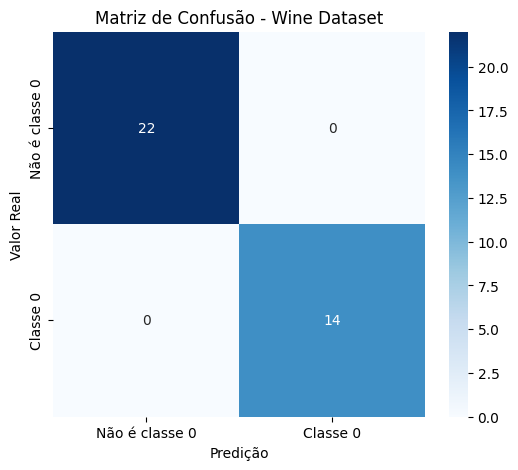

In [14]:
# Gera matriz de confusão
cm = np.array([[VN, FP], [FN, VP]])

# Gráfico
rotulos_classes = ['Não é classe 0', 'Classe 0']
plotar_matriz_confusao(cm, rotulos_classes, titulo='Matriz de Confusão - Wine Dataset')